# Metadata

```yaml
Course:  DS 5100
Term:     Summer 2023
Module:  M10 Homework KEY
Topic:   Computing Payoff for a Quota Structure
Author:  R.C. Alvarado (adapted)
Date:    7 July 2023 (revised)
```

# Instructions

In your **private course repo** use this notebook to write code that
performs the tasks below.

Save your notebook in the `M10` directory.

Remember to add and commit these files to your repo.

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save your results as a PDF and upload it to
GradeScope.

**TOTAL POINTS: 12**

------------------------------------------------------------------------

# Overview

A salesperson at a large tech firm is faced with a new payment
structure.

This salesperson has a quarterly **quota of \$225,000.**

The payment received follows a progressive schedule with four brackets
as follows:

1.  For the first 40% of quota, the salesperson receives 7% on quota
    reached.
2.  For the next 30% of quota, the salesperson receives 10% on quota
    reached.
3.  For the next 20% of quota, the salesperson receives 13% on quota
    reached.
4.  For the next 10% of quota, the salesperson receives 16% on quota
    reached.

(Note that "quota reached" means the amount reached within the bracket.)


For example, if the salesperson is 50% to quota, reaching \$112,500 of
sales, then:

-   `a` = the first 40% is paid out at 7%, thus payout = \$225,000 \*
    40% \* 7%
-   `b` = the next 10% is paid out at 10%, thus payout = \$225,000 \*
    10% \* 10%

The total payout to the salesperson would be `a + b`.

Notice what does *not* happen: getting to the second bracket does NOT
mean the payout is \$225,000 \* 50% \* 10%.

In another example, a salesperson is at 20% quota. Their payout would be
\$225,000 \* 20% \* 7%.

This schedule represents earnings up to 100% of quota. We ignore sales
above 100% here.

**Given this, the salesperson would like to know how much she would earn
if she reaches a given percentage of quarterly quota.**

Note: The quota structure in this assignment is analogous to how the US
tax system works: There are several **brackets** with rate $r$ applied
to dollars in bracket $i$.

# Task 1

(4 points)

Create a dataframe that encodes the information presented in the
question. That is, assume that each row of the dataframe stands for a
bracket, and that the columns stand for the features described in the
progressive schedule. Then, using the quarterly quota of \$225,000, add
columns to the dataframe that apply the encoded parameters to this value
for each bracket to compute the maximum earnings in dollars for each
bracket, as well as the maximum payout in dollars.

In [19]:
quota <- 225000

# Put parameters into a data structure
df <- data.frame(
    cut         = c(.4, .3, .2, .1),
    payout_pct  = c(.07, .1, .13, .16)
)

# The combined percentage for 
df$cut_sum <- cumsum(df$cut)

# Amount of quota in each bracket
df$amt <- df$cut * quota

# The (max) payout for each bracket
df$payout <- df$amt * df$payout_pct

# The cumulative sum of the payout 
df$payout_sum <- cumsum(df$payout)

# The cumulative sum of the earned quota
df$amt_sum <- cumsum(df$amt)

In [20]:
df

cut,payout_pct,cut_sum,amt,payout,payout_sum,amt_sum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4,0.07,0.4,90000,6300,6300,90000
0.3,0.10,0.7,67500,6750,13050,157500
0.2,0.13,0.9,45000,5850,18900,202500
0.1,0.16,1.0,22500,3600,22500,225000


# Task 2

(4 points)

Write a function that takes an argument for the fraction of quarterly
quota reached by the salesperson, expressed as a decimal value between
$0$ and $1$ (e.g. $0.8$ means $80\%$), and which returns the dollar
amount earned.

This function should use the previously defined dataframe as a global
variable. Note that this function is greatly simplified if your first
dataframe has cumulative sums for the dollar amount columns.

**Do not use for loops in completing this task or the next. Instead, let
your dataframe do the work.** In your function, match the amount earned
to the appropriate row in your first dataframe to get the answer.

In [18]:
get_payout <- function(qq_frac) {
  
  # Get lower row index
  row1 <- nrow(df[qq_frac >= df$cut_sum, ])
  
  # Get current row index
  row2 <- row1 + 1
  
  # Compute percent for current bracket
  if (row1 > 0) {
    cut_sum <- round(df[row1, 'cut_sum'], 1)
  } else {
    cut_sum <- 0
  }
  remainder <- round(qq_frac, 1) - cut_sum
  
  # Get payout for this bracket
  if (row2 <= 4) {
    b <- quota * df[row2, 'payout_pct'] * remainder
  } else {
    b <- 0
  }
  
  # Get payout of previous brackets
  if (row1 > 0) {
    a <- df[row1, 'payout_sum']
  } else {
    a <- 0
  }
  
  # Compute the total
  payout <- a + b

  # Return results
  return(payout)

}

# Task 3

(2 points)

Call the function to get the dollar amount earned in increments of
$10\%$ in a range between $0\%$ to $100\%$ earned. Note that you can use
`seq()` to generate these increments.

Be sure to put the results of your function at work into a second
dataframe. That is, create a dataframe with columns for percent of quota
earned and payout for that amount.

In [8]:
df2 <- data.frame(i = seq(.1, 1, by=.1))
df2$payout <- apply(df2, 1, get_payout)
df2

i,payout
<dbl>,<dbl>
0.1,1575
0.2,3150
0.3,4725
0.4,6300
0.5,8550
0.6,10800
0.7,13050
0.8,15975
0.9,18900


# Task 4

(1 point)

NOTE TO GRADER: This is confusing -- it was based on a misunderstanding
of how the payout function works. Be very lenient!

Using the first dataframe, plot the amounts earned (y-axis) versus
quarterly quota reached (x-axis).

Display the graph using both points and lines.

Hint: for both axes, use the cumulative sums, which you should have
defined above.

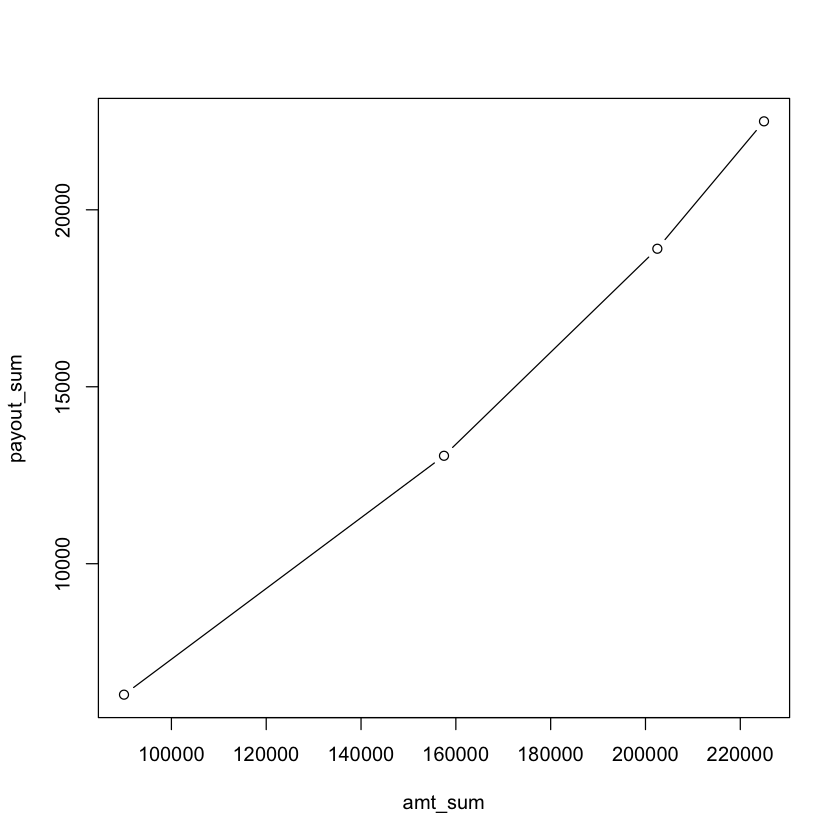

In [6]:
plot(df[c('amt_sum','payout_sum')], type='b')

# Task 5

(1 point)

Using the second dataframe, plot the dollar amount for each increment
(x-axis) versus the payout in dollars (y-axis).

Again, display the graph using both points and lines.

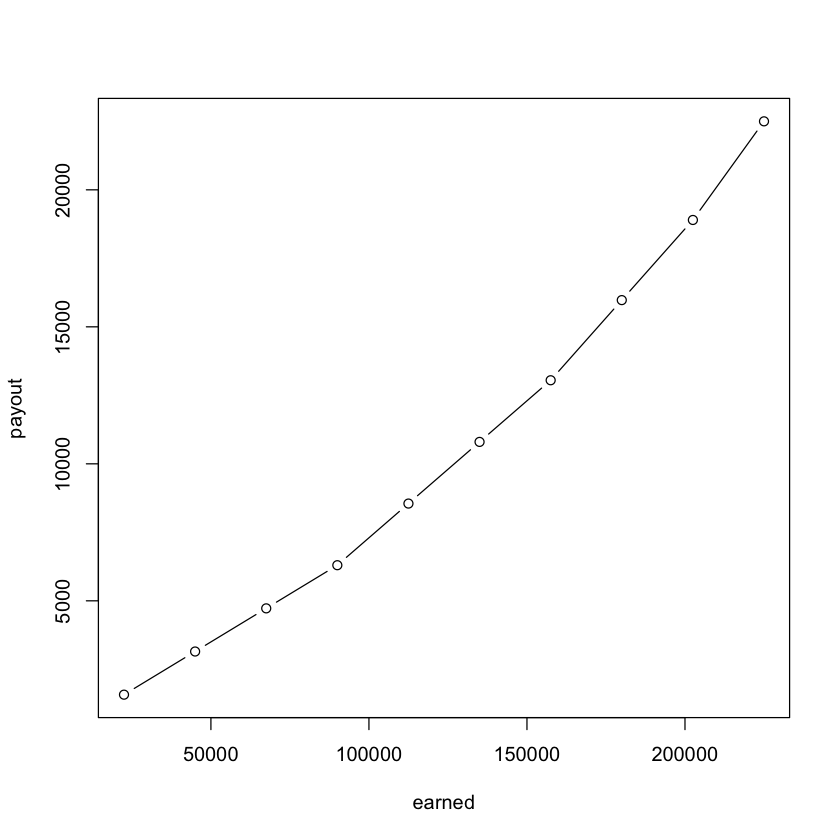

In [7]:
df2$earned = df2$i * quota

plot(df2[c('earned','payout')], type='b')